In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
# demonstration on randomly generated data
# https://medium.com/analytics-vidhya/linear-regression-in-python-from-scratch-with-scipy-statsmodels-sklearn-da8e373cc89b

nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

# adding random noise
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [3]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  2.50000000e+01,
         1.00000000e+00],
       [ 4.08163265e-01,  3.96924149e-01,  2.10849646e+01,
         1.00000000e+00],
       [ 8.16326531e-01,  7.28634783e-01,  1.75031237e+01,
         1.00000000e+00],
       [ 1.22448980e+00,  9.40632785e-01,  1.42544773e+01,
         1.00000000e+00],
       [ 1.63265306e+00,  9.98087482e-01,  1.13390254e+01,
         1.00000000e+00],
       [ 2.04081633e+00,  8.91559230e-01,  8.75676801e+00,
         1.00000000e+00],
       [ 2.44897959e+00,  6.38550320e-01,  6.50770512e+00,
         1.00000000e+00],
       [ 2.85714286e+00,  2.80629400e-01,  4.59183673e+00,
         1.00000000e+00],
       [ 3.26530612e+00, -1.23398137e-01,  3.00916285e+00,
         1.00000000e+00],
       [ 3.67346939e+00, -5.07151709e-01,  1.75968347e+00,
         1.00000000e+00],
       [ 4.08163265e+00, -8.07581691e-01,  8.43398584e-01,
         1.00000000e+00],
       [ 4.48979592e+00, -9.75328286e-01,  2.60308205e-01,
      

In [4]:
y

array([ 4.62009824,  4.91515297,  6.34792463,  6.90195503,  6.01213509,
        6.03229676,  6.14635111,  6.57093172,  6.8842711 ,  6.12026095,
        6.63017625,  6.56971697,  7.01664896,  6.90703538,  7.78326961,
        8.29069611,  8.37491659,  9.27798196,  7.9733216 ,  8.52998745,
        8.8372393 , 10.26243795,  9.13571127,  9.29545407,  9.64992599,
       10.24790778,  9.64035665,  8.89839311,  9.01812508,  9.31595804,
       10.07316393, 10.07762063, 10.746218  , 11.10639564, 10.46499859,
       10.09699821, 11.1939668 , 10.69106301, 10.00849917, 10.72170893,
       11.27884196, 11.03057739, 11.44764086, 10.4643347 , 10.23845257,
       10.32842446, 11.30957348, 10.48427747, 10.58641476, 10.30404445])

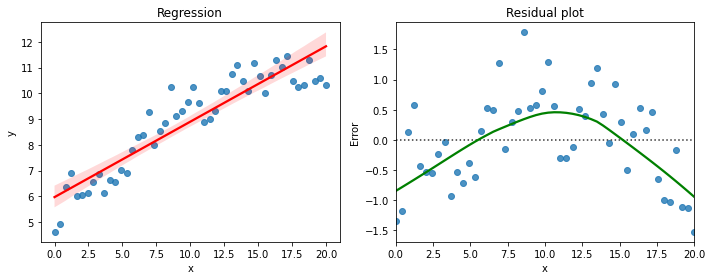

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.regplot(x=x,y=y,line_kws={'color':'red'})
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression')
plt.subplot(1,2,2)
sns.residplot(x=x,y=y,lowess=True,line_kws={'color':'green'})
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Residual plot')
plt.tight_layout()

In [6]:
df = pd.DataFrame()
df['x']=x
df['y']=y

df['xy'] = df.x * df.y
df['x2'] = df.x**2
df['y2'] = df.y**2
df['x-x.avg**2'] = (df.x - df.x.mean())**2
df['y-y.avg**2'] = (df.y - df.y.mean())**2

In [7]:
df

,x,y,xy,x2,y2,x-x.avg**2,y-y.avg**2
0,0.000000,4.620098,0.000000,0.000000,21.345308,100.000000,18.293574
1,0.408163,4.915153,2.006185,0.166597,24.158729,92.003332,15.856675
2,0.816327,6.347925,5.181979,0.666389,40.296147,84.339858,6.498790
3,1.224490,6.901955,8.451374,1.499375,47.636983,77.009579,3.980991
4,1.632653,6.012135,9.815731,2.665556,36.145768,70.012495,8.323583
5,2.040816,6.032297,12.310810,4.164931,36.388604,63.348605,8.207654
6,2.448980,6.146351,15.052288,5.997501,37.777632,57.017909,7.567153
7,2.857143,6.570932,18.774091,8.163265,43.177144,51.020408,5.411510
8,3.265306,6.884271,22.479253,10.662224,47.393189,45.356102,4.051871
9,3.673469,6.120261,22.482591,13.494377,37.457594,40.024990,7.711374


In [8]:
# using scipy.stats to find the parameters
result = ss.linregress(x,y)

result.slope

0.29289690481562325

In [9]:
result.intercept

5.968228006496777

In [10]:
result.rvalue

0.9184408354646605

In [11]:
result.pvalue

5.7612621144065296e-21

In [12]:
result.stderr

0.018207636224184774

***

In [13]:
# demonstration on dataset
# https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46

In [14]:
wine_data = pd.read_csv('winequality-red.csv',sep=';')

In [15]:
wine_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
x_wine = wine_data.quality
y_wine = wine_data.fixed_acidity

In [17]:
wine_result1 = ss.linregress(x_wine, y_wine)
wine_result1.slope

0.2674517619186496

In [18]:
wine_result1.intercept

6.812273121694265

In [19]:
wine_result1.rvalue

0.12405164911322428

In [20]:
wine_result1.pvalue

6.495635009279552e-07

In [21]:
wine_result1.stderr

0.05353315585201006

***

In [22]:
x_wine = wine_data.quality
y_wine = wine_data.pH

In [23]:
wine_result2 = ss.linregress(x_wine, y_wine)
wine_result2.slope

-0.0110367541955159

In [24]:
wine_result2.intercept

3.37331659087554

In [25]:
wine_result2.rvalue

-0.05773139120538216

In [32]:
wine_result2.pvalue

0.02096277865147354

In [33]:
wine_result2.stderr

0.004775863957969815

***

In [57]:
x_wine = wine_data.quality
y_wine = wine_data.residual_sugar

In [58]:
wine_result3 = ss.linregress(x_wine, y_wine)
wine_result3.slope

0.023973939374300205

In [59]:
wine_result3.intercept

2.4036878413751137

In [60]:
wine_result3.rvalue

0.013731637340066308

In [61]:
wine_result3.pvalue

0.5832180131580473

In [62]:
wine_result3.stderr

0.043684128006666795

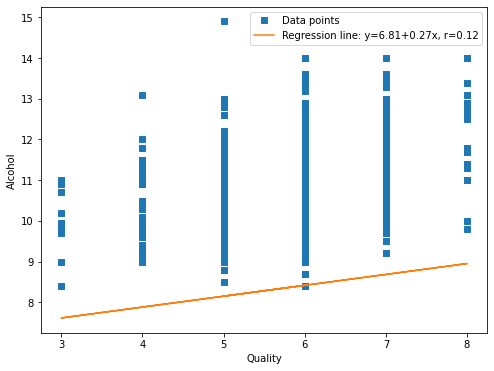

In [63]:
# Visualising the results

# Quality vs alcohol content

line = f'Regression line: y={wine_result1.intercept:.2f}+{wine_result1.slope:.2f}x, r={wine_result1.rvalue:.2f}'

x = np.array(wine_data.quality)
y = np.array(wine_data.alcohol)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, wine_result1.intercept + wine_result1.slope * x_wine, label=line)
ax.set_xlabel('Quality')
ax.set_ylabel('Alcohol')
ax.legend(facecolor='white')
plt.show()

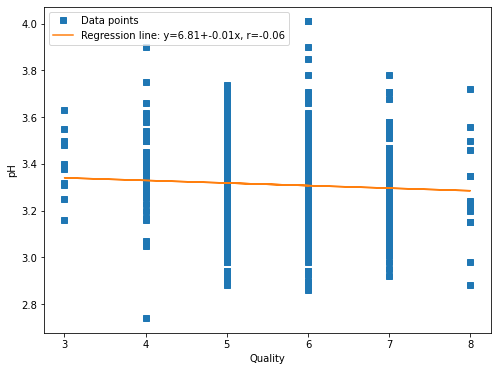

In [66]:
line = f'Regression line: y={wine_result1.intercept:.2f}+{wine_result2.slope:.2f}x, r={wine_result2.rvalue:.2f}'

x = np.array(wine_data.quality)
y = np.array(wine_data.pH)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, wine_result2.intercept + wine_result2.slope * x_wine, label=line)
ax.set_xlabel('Quality')
ax.set_ylabel('pH')
ax.legend(facecolor='white')
plt.show()

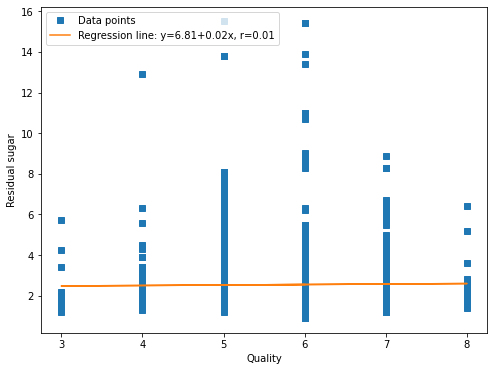

In [69]:
line = f'Regression line: y={wine_result1.intercept:.2f}+{wine_result3.slope:.2f}x, r={wine_result3.rvalue:.2f}'

x = np.array(wine_data.quality)
y = np.array(wine_data.residual_sugar)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, wine_result3.intercept + wine_result3.slope * x_wine, label=line)
ax.set_xlabel('Quality')
ax.set_ylabel('Residual sugar')
ax.legend(facecolor='white')
plt.show()